<a id=top-page></a>
# `pykitPIV` demo: Upload an external flow field generated with synthetic turbulence

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#generate-particles">Generate particles</a></li>
    <li><a href="#upload-velocity-field">Upload flow field generated with synthetic turbulence</a></li>
    <li><a href="#add-movement">Add movement to particles</a></li>
        <ul>
        <li><a href="#add-movement-update-time-sep">Update time separation</a></li>
        <li><a href="#add-movement-visualize">Visualize the PIV image pair</a></li>
        </ul>
    <li><a href="#save">Save the dataset</a></li>
    <li><a href="#upload">Upload the saved datasets</a></li>
</ol>
<p></p>
</div>
<br>

***

In [33]:
import matplotlib.pyplot as plt

In [34]:
import numpy as np
import pandas as pd
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image

In [35]:
n_images = 1

In [36]:
image_size = (124,124)

In [37]:
size_buffer = 2

In [38]:
figsize = (6,3.5)

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [39]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,3),
                     distances=(1,2),
                     densities=(0.4,0.41),
                     signal_to_noise=(5,20),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=100)

In [40]:
image = Image(random_seed=100)

In [41]:
image.add_particles(particles)

Particles added to the image.


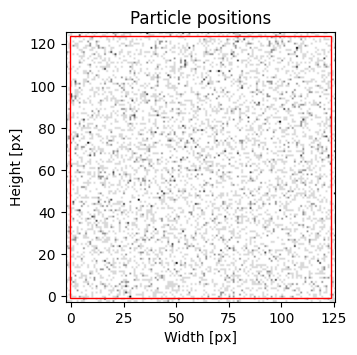

In [42]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Particle positions',
           cmap='Greys',
           figsize=figsize);

In [43]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/20)

Reflected light added to images I1.


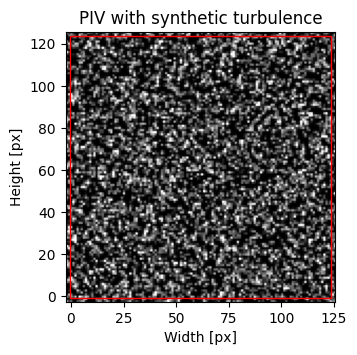

In [44]:
image.plot(0, 
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='PIV with synthetic turbulence',
           cmap='Greys_r',
           figsize=figsize);

<a id=upload-velocity-field></a>
***

## Upload flow field generated with synthetic turbulence

[Go to the top](#top-page)

In [45]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      flow_mode='user')

In [46]:
grid_size = 128
n_modes = 100

In [47]:
u_df = pd.read_csv('u_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
v_df = pd.read_csv('v_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()
w_df = pd.read_csv('w_n' + str(grid_size) + '_m' + str(n_modes) + '.txt', sep = ',', header=1).to_numpy()

u_tensor = np.reshape(u_df, (grid_size,grid_size,grid_size))
v_tensor = np.reshape(v_df, (grid_size,grid_size,grid_size))
w_tensor = np.reshape(w_df, (grid_size,grid_size,grid_size))

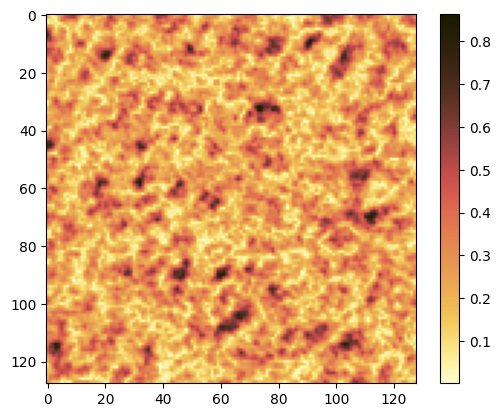

In [48]:
plt.imshow(np.sqrt(u_tensor[:,:,10]**2 + v_tensor[:,:,10]**2), cmap=cmc.lajolla_r)
plt.colorbar()

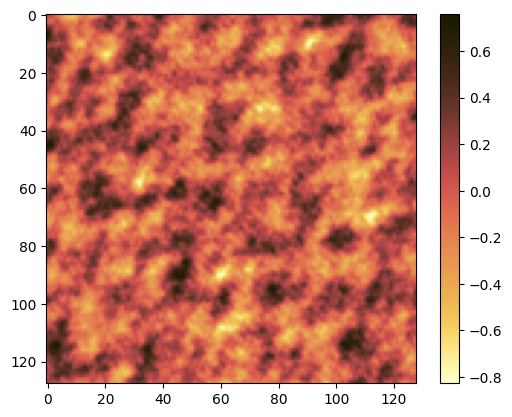

In [49]:
plt.imshow(u_tensor[:,:,10], cmap=cmc.lajolla_r)
plt.colorbar()

In [50]:
synth_turb_gen_velocity_field = (u_tensor, v_tensor)

In [51]:
flowfield.upload_flowfield(synth_turb_gen_velocity_field)

In [52]:
image.add_flowfield(flowfield)

Velocity field added to the image.


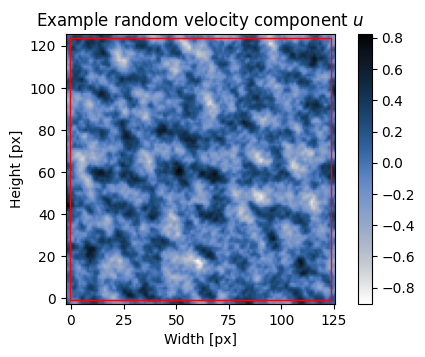

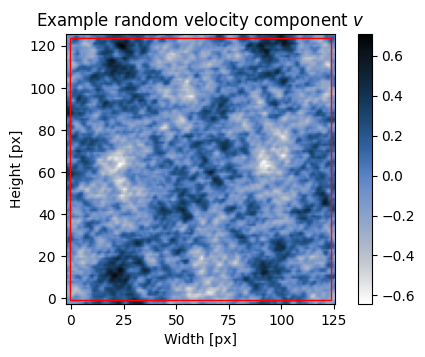

In [53]:
image.plot_velocity_field(0,
                          with_buffer=True,
                          xlabel='Width [px]',
                          ylabel='Height [px]',
                          title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                          cmap=cmc.oslo_r,
                          figsize=figsize);

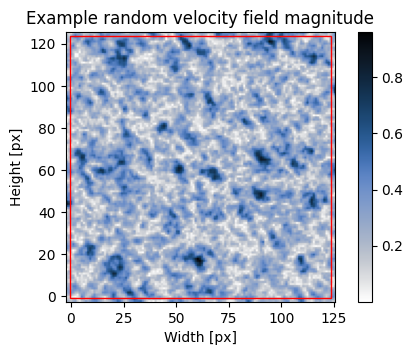

In [54]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=True,
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize);

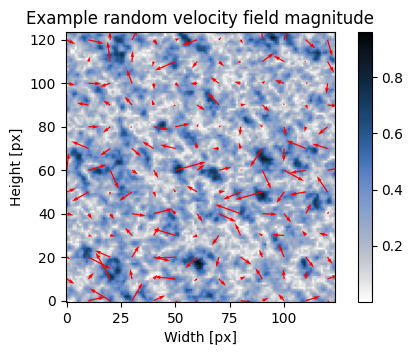

In [55]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_quiver=True,
                                    quiver_step=10,
                                    quiver_color='r',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize);

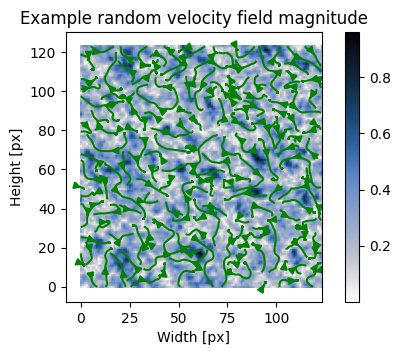

In [56]:
image.plot_velocity_field_magnitude(0,
                                    with_buffer=False,
                                    add_streamplot=True,
                                    streamplot_density=1,
                                    streamplot_color='g',
                                    xlabel='Width [px]',
                                    ylabel='Height [px]',
                                    title='Example random velocity field magnitude',
                                    cmap=cmc.oslo_r,
                                    figsize=figsize);

<a id=add-movement></a>
***

## Add movement to particles

[Go to the top](#top-page)

In [57]:
motion = Motion(particles, 
                flowfield, 
                time_separation=2)

In [58]:
motion.runge_kutta_4th(n_steps=10)

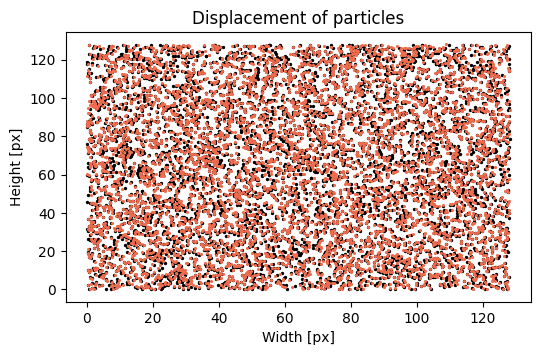

In [59]:
motion.plot_particle_motion(0,
                            xlabel='Width [px]',
                            ylabel='Height [px]',
                            title='Displacement of particles',
                            figsize=figsize);

<a id=add-movement-visualize></a>

#### Visualize the PIV image pair:

[Go to the top](#top-page)

In [60]:
image.add_motion(motion)

Particle movement added to the image.


In [61]:
image.add_reflected_light(exposures=(0.6,0.65),
                          maximum_intensity=2**16-1,
                          laser_beam_thickness=1,
                          laser_over_exposure=1,
                          laser_beam_shape=0.95,
                          alpha=1/10)

Reflected light added to images I1.
Reflected light added to images I2.


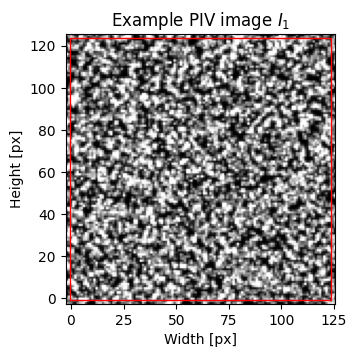

In [62]:
image.plot(0, 
           instance=1,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_1$',
           cmap='Greys_r',
           figsize=figsize);

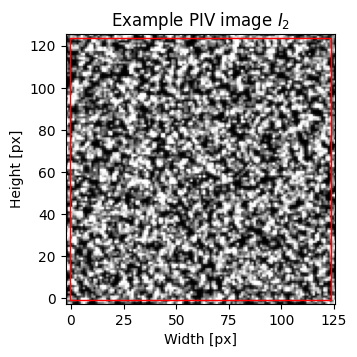

In [63]:
image.plot(0, 
           instance=2,
           with_buffer=True,
           xlabel='Width [px]',
           ylabel='Height [px]',
           title='Example PIV image $I_2$',
           cmap='Greys_r',
           figsize=figsize);

MovieWriter ffmpeg unavailable; using Pillow instead.


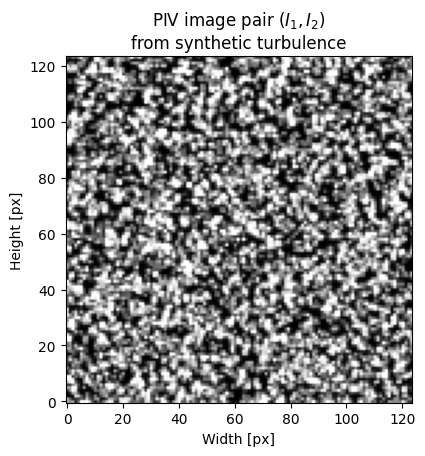

In [64]:
image.plot_image_pair(0,
                      with_buffer=False, 
                      xlabel='Width [px]',
                      ylabel='Height [px]',
                      title='PIV image pair $(I_1, I_2)$\nfrom synthetic turbulence',
                      cmap='Greys_r',
                      figsize=(6,4.5), 
                      dpi=600,
                      filename='PIV-image-I1-I2-vkp-m100.gif');

***